In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots appear in the notebook
%matplotlib inline

# Load the dataset from the data/ folder
data_path = "../data/resume_data.csv" 
df = pd.read_csv(data_path)

# Inspect the first few rows
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [5]:
# Check the shape of the dataset
print("Dataset shape:", df.shape)
print("")

# Show column names and data types
df.info()
print("")

# Check basic descriptive stats (numerical columns only)
df.describe()
print("")

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

#Number of unique values in each category column
print("Unique values per column:")
print(df['Category'].nunique())
print(df['Category'].unique())

Dataset shape: (2484, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


Missing values per column:
ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64
Unique values per column:
24
['HR' 'DESIGNER' 'INFORMATION-TECHNOLOGY' 'TEACHER' 'ADVOCATE'
 'BUSINESS-DEVELOPMENT' 'HEALTHCARE' 'FITNESS' 'AGRICULTURE' 'BPO' 'SALES'
 'CONSULTANT' 'DIGITAL-MEDIA' 'AUTOMOBILE' 'CHEF' 'FINANCE' 'APPAREL'
 'ENGINEERING' 'ACCOUNTANT' 'CONSTRUCTION' 'PUBLIC-RELATIONS' 'BANKING'
 'ARTS' 'AVIATION']


Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64


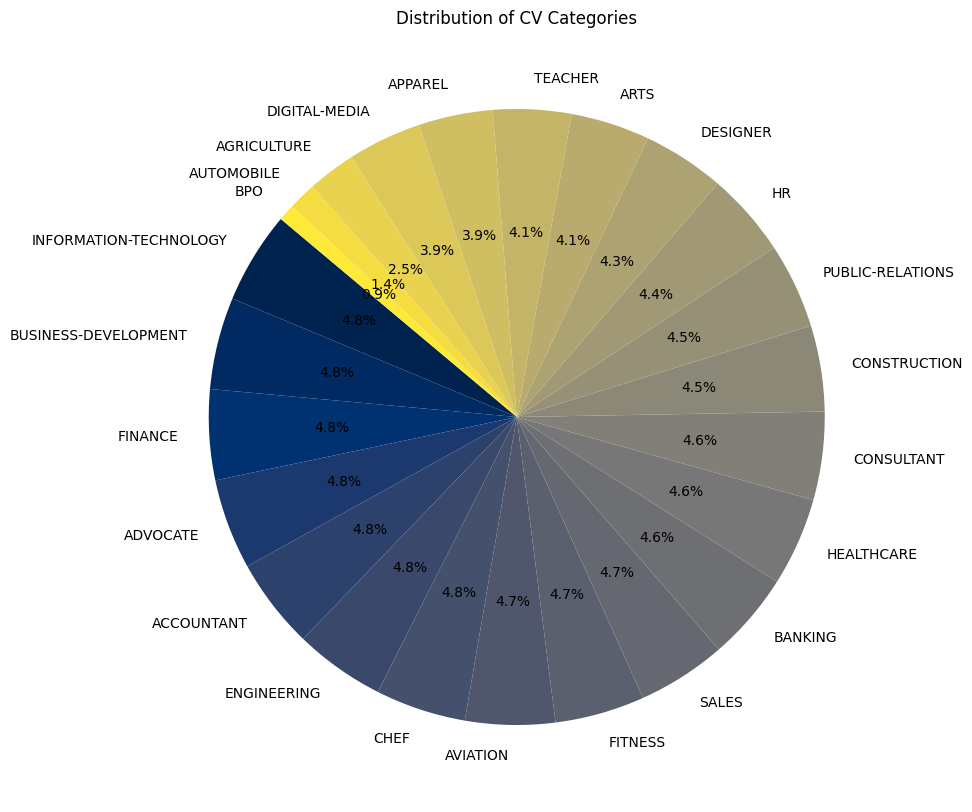

In [6]:
# Count how many resumes per category
category_counts = df["Category"].value_counts()
print(category_counts)

# Quick pie chart of category distribution with percentages
plt.figure(figsize=(10, 10))
category_counts.plot.pie(autopct='%1.1f%%', startangle=140, cmap='cividis', legend=False)
plt.title("Distribution of CV Categories")
plt.ylabel("")  # Remove the y-label
plt.show()


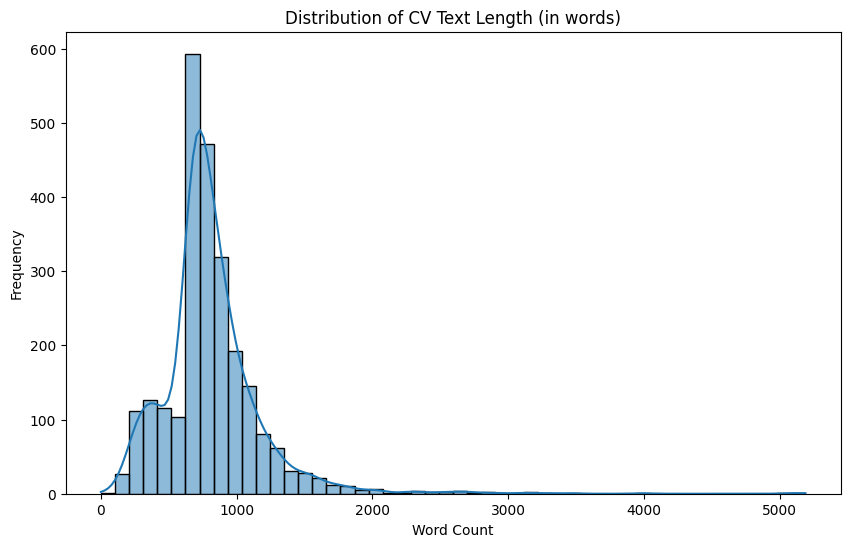

count    2484.000000
mean      811.325282
std       371.007491
min         0.000000
25%       651.000000
50%       757.000000
75%       933.000000
max      5190.000000
Name: resume_length, dtype: float64

In [7]:
# Calculate the length of each CV in terms of word count
df["resume_length"] = df["Resume_str"].apply(lambda x: len(str(x).split()))

# Plot the distribution of CV text lengths
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="resume_length", bins=50, kde=True)
plt.title("Distribution of CV Text Length (in words)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# Display descriptive statistics about the CV lengths
df["resume_length"].describe()

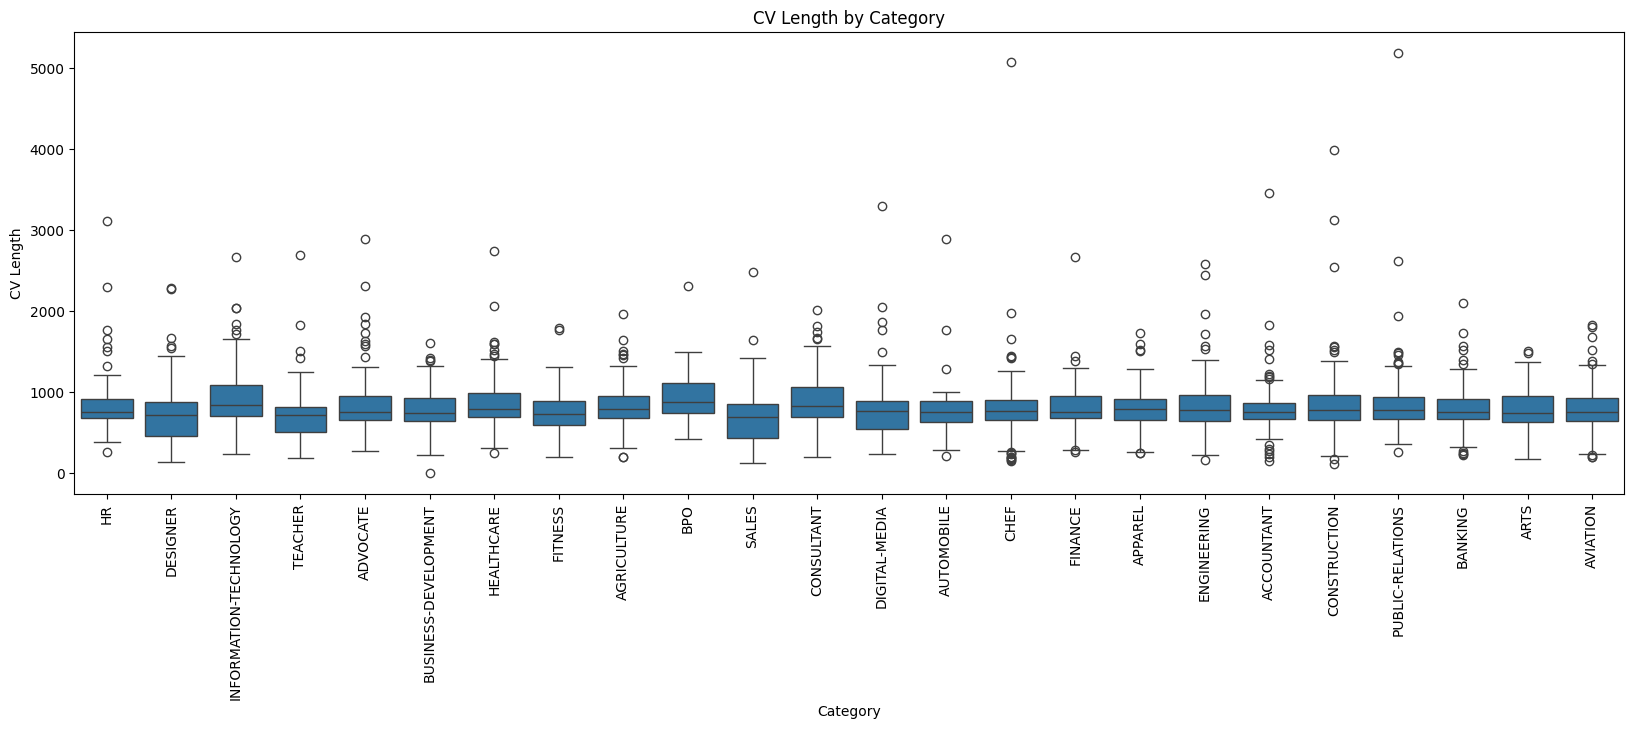

In [8]:
# Plot a boxplot to show the distribution of CV lengths by category
plt.figure(figsize=(20, 6))
sns.boxplot(x='Category', y='resume_length', data=df)
plt.xlabel('Category')
plt.ylabel('CV Length')
plt.title('CV Length by Category')
plt.xticks(rotation=90)
plt.show()


Generating initial word cloud to look at most common words.

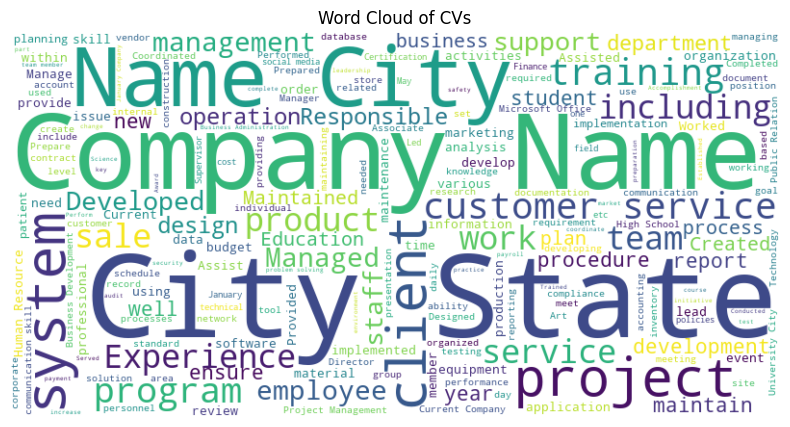

In [9]:
# Import the WordCloud module
from wordcloud import WordCloud

# Combine all cv texts into a single string
text = ' '.join(df['Resume_str'])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of CVs')
plt.show()

Removing stop words discovered in initial word cloud.

In [217]:
import spacy
import nltk
from nltk.stem import PorterStemmer

# Load the small English model
nlp = spacy.load('en_core_web_sm')

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Define custom stop words
custom_stop_words = {"name", "company", "city", "state", "experience", "project", "client", "system", "service", "program", "training", 
    "team", "work", "developed", "managed", "management", "manage", "include", "develop", "create", "provide", "assist", "support", 
    "lead", "process", "sale", "design", "maintain", "operation", "product", "report", "review", "skill", "employee", 
    "customer", "business"}

def preprocess_text(text):
    doc = nlp(text)
    tokens = [
        stemmer.stem(token.lemma_.lower().strip())
        for token in doc
        if (not token.is_stop 
            and not token.is_punct 
            and not token.like_num 
            and token.lemma_ != '-PRON-' 
            and token.lemma_.lower().strip() not in custom_stop_words)
    ]
    return " ".join(tokens)

# Apply preprocessing to each resume text and save the result in a new column
df['processed_resume'] = df['Resume_str'].astype(str).apply(preprocess_text)

Another word cloud after processing the text, all lower case, remove punctuation, removing default stop words, removing custom stop words

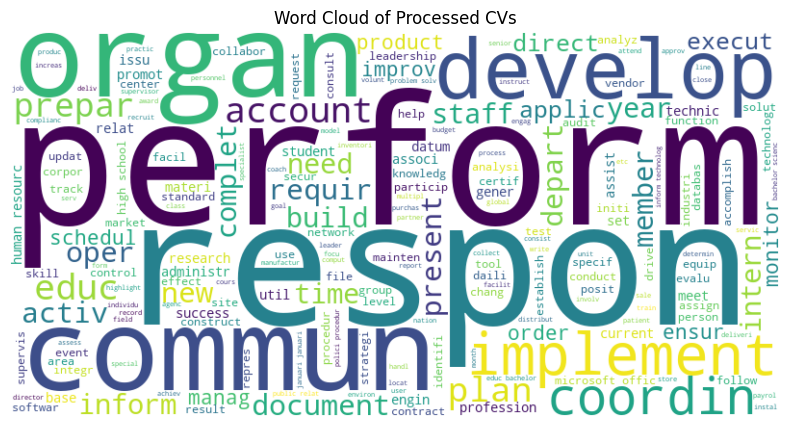

In [218]:
# Combine all processed resume texts into a single string
processed_text = ' '.join(df['processed_resume'])

# Generate a word cloud image from the processed text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

# Display the word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Processed CVs')
plt.show()


# Category-wise Word Frequency

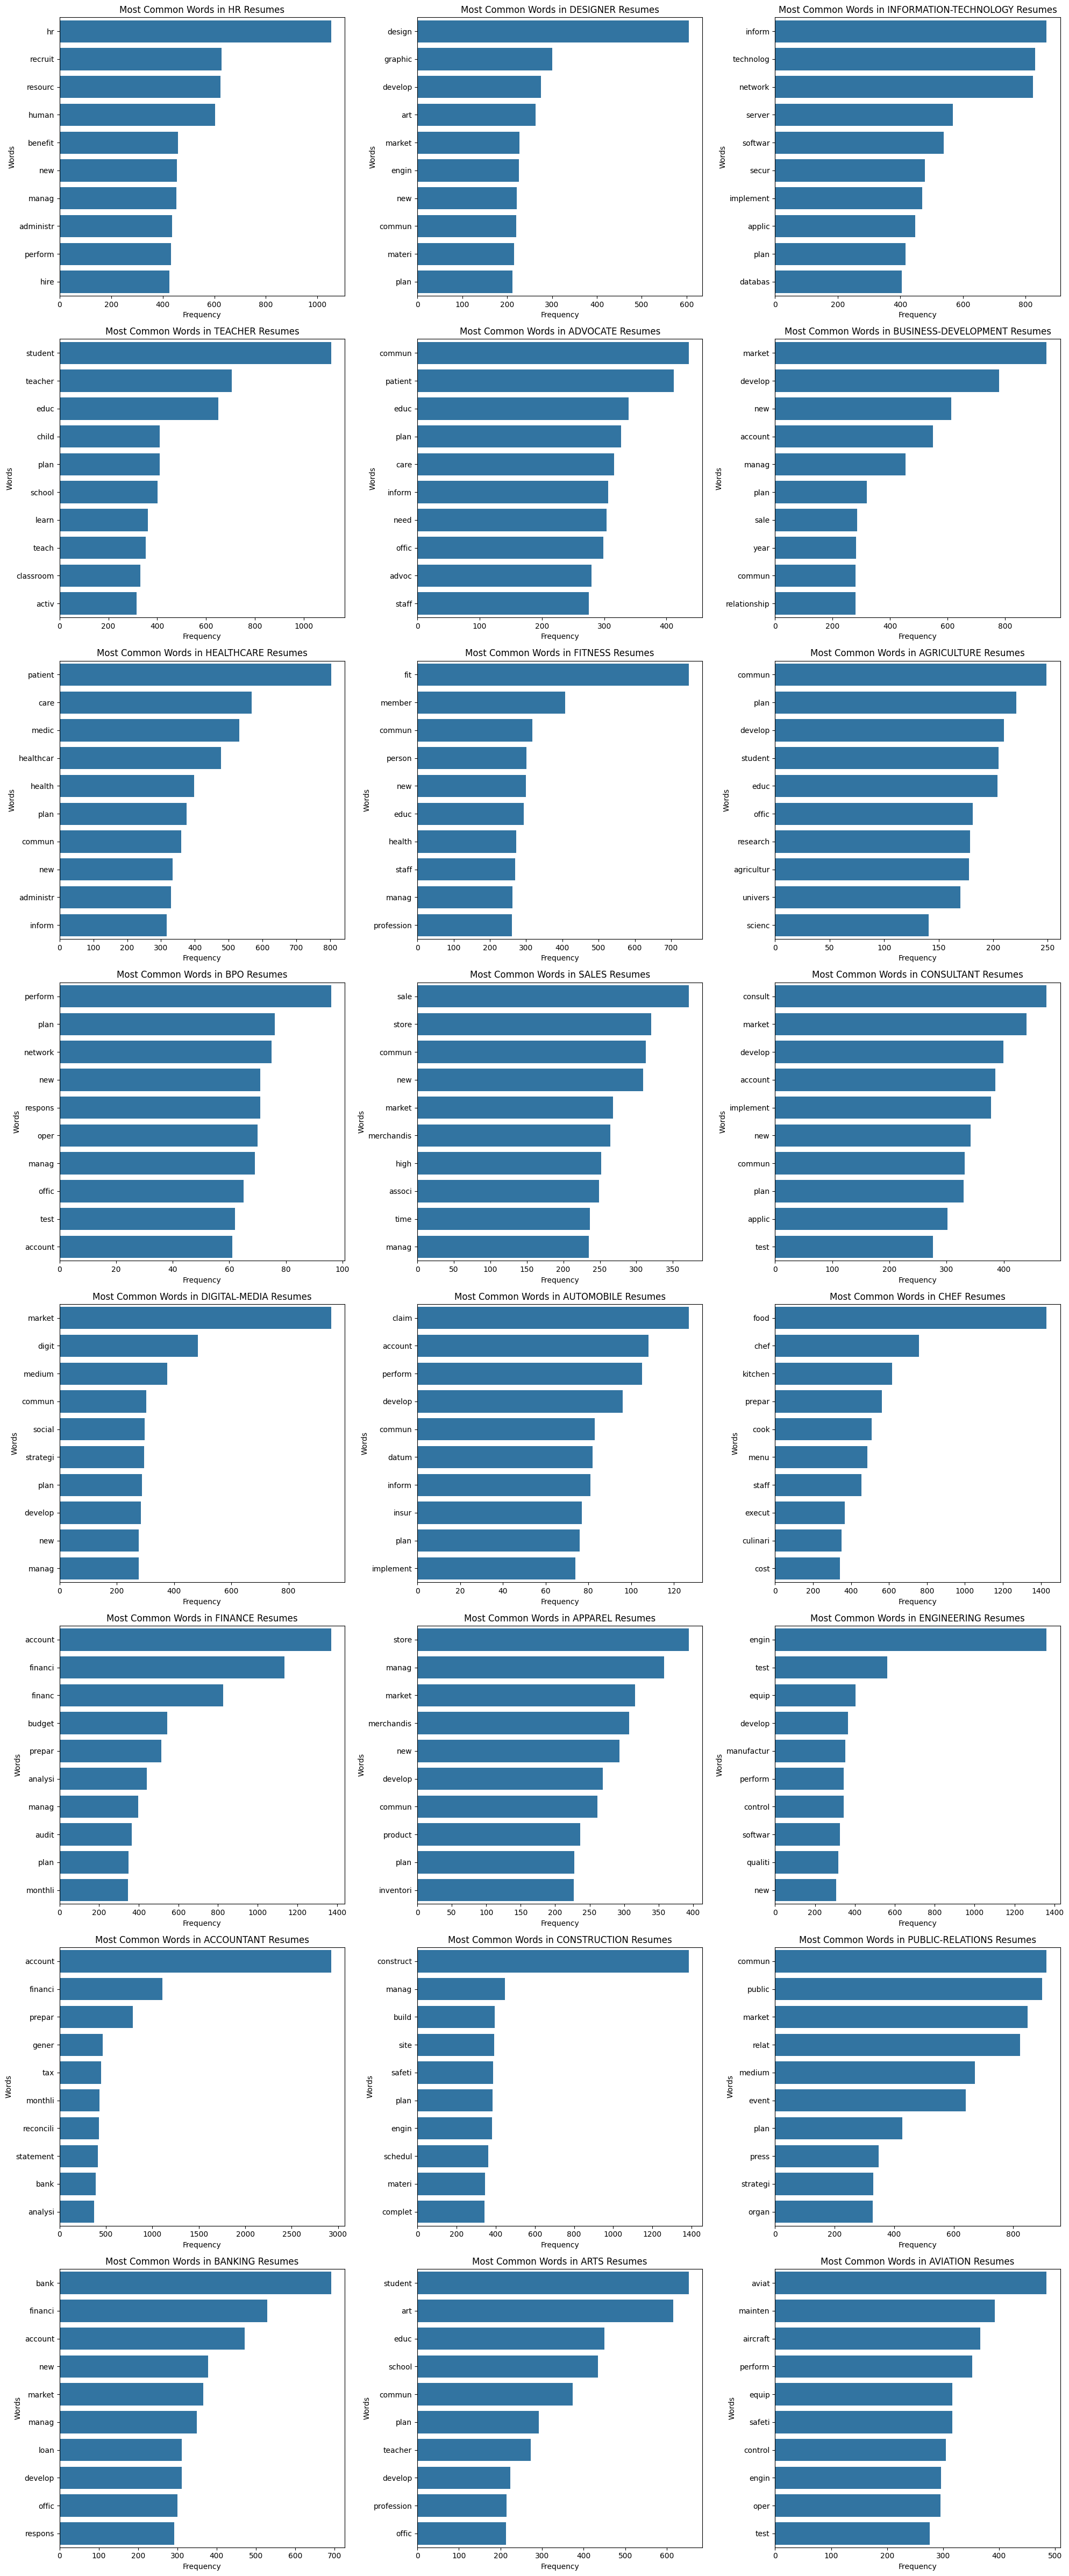

In [219]:
from collections import Counter

# Count the frequency of each word for each category
category_word_counts = {}
for category in df['Category'].unique():
    category_text = ' '.join(df[df['Category'] == category]['processed_resume'])
    tokens = category_text.split()
    category_word_counts[category] = Counter(tokens)

# Plot the most common words for each category using a grid of bar plots
num_categories = len(category_word_counts)
num_cols = 3
num_rows = (num_categories + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))
axes = axes.flatten()

for i, (category, word_count) in enumerate(category_word_counts.items()):
    common_words = word_count.most_common(10)
    words, counts = zip(*common_words)
    
    sns.barplot(x=list(counts), y=list(words), ax=axes[i])
    axes[i].set_title(f"Most Common Words in {category} Resumes")
    axes[i].set_xlabel("Frequency")
    axes[i].set_ylabel("Words")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#APPROACH 1 - TF-IDF Method

In [220]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Limit TF-IDF to top 500 features
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df['processed_resume'])
print("TF-IDF matrix shape:", tfidf_matrix.shape)

TF-IDF matrix shape: (2484, 1000)


In [221]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Category' column
df['Category_encoded'] = label_encoder.fit_transform(df['Category'])

# Display the first few rows to verify the changes
df[['Category', 'Category_encoded']].head()

,Category,Category_encoded
0,HR,19
1,HR,19
2,HR,19
3,HR,19
4,HR,19


In [222]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    tfidf_matrix, 
    df['Category_encoded'], 
    test_size=0.2, 
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1987, 1000)
Test set shape: (497, 1000)


In [223]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and fit the Dummy classifier (baseline)
baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X_train, y_train)

# Predict on the test set using the baseline model
y_pred = baseline_model.predict(X_test)

# Compute and print the accuracy score
acc = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", acc)

# Generate and print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate and print the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_mat)

Test Set Accuracy: 0.03822937625754527

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00        21
           7       0.00      0.00      0.00        23
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00        27
          10       0.00      0.00      0.00        24
          11       0.00      0.00      0.00        34
          12       0.00      0.00      0.00        20
          13       0.00      0.00      0.00        19
          14       0.00      0.00      0.00        25
          15       0.00      0.00      0.00        21
          16      

c:\Users\ItsLo\anaconda3\envs\cv-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ItsLo\anaconda3\envs\cv-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ItsLo\anaconda3\envs\cv-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [224]:
from sklearn.neighbors import KNeighborsClassifier

# Using 'distance' weighting to give closer points more influence
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [225]:
# Predict on the test set using the KNN model
y_pred_knn = knn.predict(X_test)

# Compute and print the accuracy score
acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Model Test Set Accuracy:", acc_knn)

# Generate and print the classification report
print("\nKNN Model Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Generate and print the confusion matrix
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
print("\nKNN Model Confusion Matrix:")
print(conf_mat_knn)

KNN Model Test Set Accuracy: 0.5070422535211268

KNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.86      0.68        29
           1       0.36      0.47      0.41        30
           2       0.14      0.12      0.13         8
           3       0.25      0.30      0.27        20
           4       0.22      0.22      0.22        18
           5       0.14      0.17      0.15         6
           6       0.58      0.67      0.62        21
           7       0.71      0.52      0.60        23
           8       0.00      0.00      0.00         2
           9       0.38      0.59      0.46        27
          10       0.94      0.67      0.78        24
          11       0.85      0.65      0.73        34
          12       0.20      0.25      0.22        20
          13       0.64      0.47      0.55        19
          14       0.79      0.60      0.68        25
          15       0.43      0.57      0.49        21

c:\Users\ItsLo\anaconda3\envs\cv-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ItsLo\anaconda3\envs\cv-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ItsLo\anaconda3\envs\cv-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [226]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for KNN
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance']
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Use the best KNN estimator to predict on the test set
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test)
acc_best = accuracy_score(y_test, y_pred_best)
print("Test set accuracy of best KNN model:", acc_best)

Best parameters: {'n_neighbors': 12, 'weights': 'uniform'}
Best cross-validation score: 0.5621748541194638
Test set accuracy of best KNN model: 0.5593561368209256


In [227]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation with the best KNN classifier
cv_scores_best_knn = cross_val_score(best_knn, tfidf_matrix, df['Category_encoded'], cv=5, scoring='accuracy')

print("Cross-validation scores with best KNN:", cv_scores_best_knn)
print("Mean cross-validation accuracy with best KNN:", cv_scores_best_knn.mean())

Cross-validation scores with best KNN: [0.58752515 0.57947686 0.53118712 0.56740443 0.51209677]
Mean cross-validation accuracy with best KNN: 0.5555380671123515


In [229]:
from sklearn.svm import SVC

# Initialize the SVM model with balanced class weights
svm_model = SVC(kernel='linear', C=1, random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [230]:
# Evaluate the SVM model on the test set
y_pred_svm = svm_model.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Model Test Set Accuracy:", acc_svm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

SVM Model Test Set Accuracy: 0.6197183098591549

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.86      0.74        29
           1       0.49      0.57      0.52        30
           2       0.25      0.12      0.17         8
           3       0.45      0.50      0.48        20
           4       0.12      0.11      0.12        18
           5       0.50      0.17      0.25         6
           6       0.75      0.86      0.80        21
           7       0.83      0.65      0.73        23
           8       0.00      0.00      0.00         2
           9       0.78      0.52      0.62        27
          10       0.83      0.62      0.71        24
          11       0.86      0.74      0.79        34
          12       0.46      0.30      0.36        20
          13       0.83      0.79      0.81        19
          14       0.85      0.68      0.76        25
          15       0.54      0.71      0.61        21
         

c:\Users\ItsLo\anaconda3\envs\cv-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ItsLo\anaconda3\envs\cv-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ItsLo\anaconda3\envs\cv-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [231]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best cross-validation score for SVM:", grid_search_svm.best_score_)

# Use the best SVM estimator to predict on the test set
best_svm = grid_search_svm.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)
acc_best_svm = accuracy_score(y_test, y_pred_best_svm)
print("Test set accuracy of best SVM model:", acc_best_svm)

Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score for SVM: 0.6336379631153247
Test set accuracy of best SVM model: 0.6197183098591549


In [199]:
# Perform 5-fold cross-validation using the best SVM model from grid search
cv_scores_best_svm = cross_val_score(best_svm, tfidf_matrix, df['Category_encoded'], cv=5, scoring='accuracy')
print("Best SVM Cross-validation scores:", cv_scores_best_svm)
print("Mean Best SVM CV accuracy:", cv_scores_best_svm.mean())

Best SVM Cross-validation scores: [0.71428571 0.68812877 0.62374245 0.61368209 0.59475806]
Mean Best SVM CV accuracy: 0.646919419744272


In [200]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the decision tree classifier with balanced class weights
decision_tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [201]:
# Predict on the test set using the decision tree model
y_pred_tree = decision_tree.predict(X_test)

# Compute and print the accuracy score
acc_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Model Test Set Accuracy:", acc_tree)

# Generate and print the classification report
print("\nDecision Tree Model Classification Report:")
print(classification_report(y_test, y_pred_tree))

# Generate and print the confusion matrix
conf_mat_tree = confusion_matrix(y_test, y_pred_tree)
print("\nDecision Tree Model Confusion Matrix:")
print(conf_mat_tree)

Decision Tree Model Test Set Accuracy: 0.5533199195171026

Decision Tree Model Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.62      0.71        29
           1       0.81      0.70      0.75        30
           2       0.11      0.25      0.15         8
           3       0.18      0.20      0.19        20
           4       0.21      0.22      0.22        18
           5       0.18      0.33      0.24         6
           6       0.73      0.90      0.81        21
           7       0.62      0.65      0.64        23
           8       0.00      0.00      0.00         2
           9       0.33      0.22      0.27        27
          10       0.84      0.67      0.74        24
          11       0.76      0.76      0.76        34
          12       0.67      0.40      0.50        20
          13       0.74      0.89      0.81        19
          14       0.57      0.52      0.54        25
          15       0.65      0.62

In [202]:
# Define the hyperparameter grid for the Decision Tree model
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with 5-fold cross-validation using a new DecisionTreeClassifier
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              param_grid=param_grid_dt,
                              cv=5,
                              scoring='accuracy',
                              n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validation score for Decision Tree:", grid_search_dt.best_score_)

# Use the best Decision Tree model to predict on the test set
best_dt = grid_search_dt.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)
acc_best_dt = accuracy_score(y_test, y_pred_best_dt)
print("Test set accuracy of best Decision Tree model:", acc_best_dt)

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10}
Best cross-validation score for Decision Tree: 0.5379896965938002
Test set accuracy of best Decision Tree model: 0.5694164989939637


In [203]:
cv_scores_best_dt = cross_val_score(best_dt, tfidf_matrix, df['Category_encoded'], cv=5, scoring='accuracy')
print("Decision Tree best model cross-validation scores:", cv_scores_best_dt)
print("Mean cross-validation accuracy:", cv_scores_best_dt.mean())

Decision Tree best model cross-validation scores: [0.59959759 0.56539235 0.55130785 0.52515091 0.48991935]
Mean cross-validation accuracy: 0.5462736093983254


In [204]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

MultinomialNB()

In [205]:
# Predict on the test set using the Naive Bayes model
y_pred_nb = nb_model.predict(X_test)

# Compute and print the accuracy score
acc_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Test Set Accuracy:", acc_nb)

# Generate and print the classification report
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Generate and print the confusion matrix
print("\nNaive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Naive Bayes Test Set Accuracy: 0.5835010060362174

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.93      0.82        29
           1       0.52      0.47      0.49        30
           2       1.00      0.12      0.22         8
           3       0.45      0.25      0.32        20
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         6
           6       0.68      0.81      0.74        21
           7       0.78      0.61      0.68        23
           8       0.00      0.00      0.00         2
           9       0.68      0.56      0.61        27
          10       0.81      0.71      0.76        24
          11       0.88      0.68      0.77        34
          12       0.33      0.05      0.09        20
          13       0.82      0.74      0.78        19
          14       0.82      0.56      0.67        25
          15       0.45      0.62      0.52      

c:\Users\ItsLo\anaconda3\envs\cv-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ItsLo\anaconda3\envs\cv-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ItsLo\anaconda3\envs\cv-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [206]:
# Define the hyperparameter grid for the MultinomialNB model
param_grid_nb = {
    'alpha': [0.01, 0.1, 0.5, 1.0],
    'fit_prior': [True, False]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_nb = GridSearchCV(nb_model, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_nb.fit(X_train, y_train)

print("Best parameters for NB:", grid_search_nb.best_params_)
print("Best cross-validation score for NB:", grid_search_nb.best_score_)

# Use the best NB estimator to predict on the test set
best_nb = grid_search_nb.best_estimator_
y_pred_best_nb = best_nb.predict(X_test)
acc_best_nb = accuracy_score(y_test, y_pred_best_nb)
print("Test set accuracy for best NB model:", acc_best_nb)

Best parameters for NB: {'alpha': 0.5, 'fit_prior': False}
Best cross-validation score for NB: 0.5702201182233586
Test set accuracy for best NB model: 0.5774647887323944


In [207]:
cv_scores_best_nb = cross_val_score(best_nb, tfidf_matrix, df['Category_encoded'], cv=5, scoring='accuracy')
print("Best NB cross-validation scores:", cv_scores_best_nb)
print("Mean CV accuracy for best NB model:", cv_scores_best_nb.mean())

Best NB cross-validation scores: [0.60362173 0.58953722 0.57545272 0.58350101 0.51008065]
Mean CV accuracy for best NB model: 0.5724386642435257


In [208]:
# Use the cross validation scores that were calculated in earlier cells

print("Decision Tree best model cross-validation scores:", cv_scores_best_dt)
print("Mean CV score for Decision Tree:", cv_scores_best_dt.mean(), "\n")

print("KNN best model cross-validation scores:", cv_scores_best_knn)
print("Mean CV score for KNN:", cv_scores_best_knn.mean(), "\n")

print("SVM best model cross-validation scores:", cv_scores_best_svm)
print("Mean CV score for SVM:", cv_scores_best_svm.mean(), "\n")

print("Best NB cross-validation scores:", cv_scores_best_nb)
print("Mean CV accuracy for best NB model:", cv_scores_best_nb.mean())


Decision Tree best model cross-validation scores: [0.59959759 0.56539235 0.55130785 0.52515091 0.48991935]
Mean CV score for Decision Tree: 0.5462736093983254 

KNN best model cross-validation scores: [0.59758551 0.59959759 0.56338028 0.55935614 0.53024194]
Mean CV score for KNN: 0.5700322905172974 

SVM best model cross-validation scores: [0.71428571 0.68812877 0.62374245 0.61368209 0.59475806]
Mean CV score for SVM: 0.646919419744272 

Best NB cross-validation scores: [0.60362173 0.58953722 0.57545272 0.58350101 0.51008065]
Mean CV accuracy for best NB model: 0.5724386642435257


APROACH 2 - Word2Vec Method

In [209]:
from gensim.models import Word2Vec

# Tokenize the processed resumes
tokenized_resumes = [resume.split() for resume in df['processed_resume'].astype(str)]

# Train a Word2Vec model using skip-gram (sg=1) with a vector size of 100 and a window of 5.
w2v_model = Word2Vec(
    sentences=tokenized_resumes, 
    vector_size=100, 
    window=5, 
    min_count=5,  # ignore words that appear less than 5 times
    workers=4, 
    sg=1  # 1 for skip-gram; 0 for CBOW
)

# Print the vocabulary size as a quick check
print("Vocabulary size:", len(w2v_model.wv.index_to_key))

Vocabulary size: 11063


In [210]:
# Function to compute the average word vector for a document
def get_doc_vector(doc):
    tokens = doc.split()
    # Get vectors for tokens present in the Word2Vec vocabulary
    vectors = [w2v_model.wv[token] for token in tokens if token in w2v_model.wv.index_to_key]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(w2v_model.vector_size)

# Create a new column with document vectors
df['doc_vector'] = df['processed_resume'].apply(get_doc_vector)

# Display the dimension of the first document vector as a check
print("Dimension of document vector:", df['doc_vector'].iloc[0].shape)

Dimension of document vector: (100,)


In [211]:
# Stack the document vectors into a matrix
doc_vectors = np.vstack(df['doc_vector'])
print("Doc vector matrix shape:", doc_vectors.shape)

# Split the document vectors and corresponding labels into training and test sets
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(
    doc_vectors, 
    df['Category_encoded'], 
    test_size=0.2, 
    random_state=42
)

print("Training set shape:", X_train_w2v.shape)
print("Test set shape:", X_test_w2v.shape)

Doc vector matrix shape: (2484, 100)
Training set shape: (1987, 100)
Test set shape: (497, 100)


In [212]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# KNN Model with Word2Vec features

knn_w2v = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance']
}
grid_knn = GridSearchCV(knn_w2v, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train_w2v, y_train_w2v)
best_knn_w2v = grid_knn.best_estimator_

y_pred_knn_w2v = best_knn_w2v.predict(X_test_w2v)
acc_knn_w2v = accuracy_score(y_test_w2v, y_pred_knn_w2v)
print("KNN (Word2Vec) Accuracy:", acc_knn_w2v)
print(classification_report(y_test_w2v, y_pred_knn_w2v))
print("Confusion Matrix:\n", confusion_matrix(y_test_w2v, y_pred_knn_w2v))
print("-" * 50)

# SVM Model with Word2Vec features

svm_w2v = SVC(random_state=42)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_svm = GridSearchCV(svm_w2v, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train_w2v, y_train_w2v)
best_svm_w2v = grid_svm.best_estimator_

y_pred_svm_w2v = best_svm_w2v.predict(X_test_w2v)
acc_svm_w2v = accuracy_score(y_test_w2v, y_pred_svm_w2v)
print("SVM (Word2Vec) Accuracy:", acc_svm_w2v)
print(classification_report(y_test_w2v, y_pred_svm_w2v))
print("Confusion Matrix:\n", confusion_matrix(y_test_w2v, y_pred_svm_w2v))
print("-" * 50)

# Decision Tree Model with Word2Vec features

dt_w2v = DecisionTreeClassifier(random_state=42, class_weight='balanced')
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_dt = GridSearchCV(dt_w2v, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train_w2v, y_train_w2v)
best_dt_w2v = grid_dt.best_estimator_

y_pred_dt_w2v = best_dt_w2v.predict(X_test_w2v)
acc_dt_w2v = accuracy_score(y_test_w2v, y_pred_dt_w2v)
print("Decision Tree (Word2Vec) Accuracy:", acc_dt_w2v)
print(classification_report(y_test_w2v, y_pred_dt_w2v))
print("Confusion Matrix:\n", confusion_matrix(y_test_w2v, y_pred_dt_w2v))
print("-" * 50)

# GaussianNB Model with Word2Vec features
# Note: MultinomialNB is not suitable as doc_vectors can have negative values.

gnb_w2v = GaussianNB()
param_grid_gnb = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]
}
grid_gnb = GridSearchCV(gnb_w2v, param_grid_gnb, cv=5, scoring='accuracy', n_jobs=-1)
grid_gnb.fit(X_train_w2v, y_train_w2v)
best_gnb_w2v = grid_gnb.best_estimator_

y_pred_gnb_w2v = best_gnb_w2v.predict(X_test_w2v)
acc_gnb_w2v = accuracy_score(y_test_w2v, y_pred_gnb_w2v)
print("GaussianNB (Word2Vec) Accuracy:", acc_gnb_w2v)
print(classification_report(y_test_w2v, y_pred_gnb_w2v))
print("Confusion Matrix:\n", confusion_matrix(y_test_w2v, y_pred_gnb_w2v))
print("-" * 50)

# Optional: Perform cross-validation on the best models over the entire dataset (doc_vectors and Category_encoded)
print("Cross-validation (KNN) scores:", cross_val_score(best_knn_w2v, doc_vectors, df['Category_encoded'], cv=5, scoring='accuracy'))
print("Cross-validation (SVM) scores:", cross_val_score(best_svm_w2v, doc_vectors, df['Category_encoded'], cv=5, scoring='accuracy'))
print("Cross-validation (Decision Tree) scores:", cross_val_score(best_dt_w2v, doc_vectors, df['Category_encoded'], cv=5, scoring='accuracy'))
print("Cross-validation (GaussianNB) scores:", cross_val_score(best_gnb_w2v, doc_vectors, df['Category_encoded'], cv=5, scoring='accuracy'))

KNN (Word2Vec) Accuracy: 0.482897384305835
              precision    recall  f1-score   support

           0       0.74      0.86      0.79        29
           1       0.60      0.30      0.40        30
           2       0.08      0.12      0.10         8
           3       0.43      0.15      0.22        20
           4       0.25      0.22      0.24        18
           5       0.00      0.00      0.00         6
           6       0.33      0.43      0.38        21
           7       0.80      0.52      0.63        23
           8       0.00      0.00      0.00         2
           9       0.47      0.52      0.49        27
          10       0.77      0.71      0.74        24
          11       0.76      0.56      0.64        34
          12       0.12      0.05      0.07        20
          13       0.67      0.53      0.59        19
          14       0.58      0.44      0.50        25
          15       0.40      0.57      0.47        21
          16       0.47      0.47     

c:\Users\ItsLo\anaconda3\envs\cv-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ItsLo\anaconda3\envs\cv-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ItsLo\anaconda3\envs\cv-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM (Word2Vec) Accuracy: 0.5291750503018109
              precision    recall  f1-score   support

           0       0.73      0.83      0.77        29
           1       0.55      0.57      0.56        30
           2       0.00      0.00      0.00         8
           3       0.47      0.35      0.40        20
           4       0.26      0.28      0.27        18
           5       0.50      0.17      0.25         6
           6       0.50      0.62      0.55        21
           7       0.72      0.57      0.63        23
           8       0.00      0.00      0.00         2
           9       0.55      0.44      0.49        27
          10       0.71      0.62      0.67        24
          11       0.73      0.56      0.63        34
          12       0.18      0.10      0.13        20
          13       0.60      0.63      0.62        19
          14       0.75      0.60      0.67        25
          15       0.46      0.62      0.53        21
          16       0.50      0.37    

c:\Users\ItsLo\anaconda3\envs\cv-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ItsLo\anaconda3\envs\cv-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ItsLo\anaconda3\envs\cv-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree (Word2Vec) Accuracy: 0.32193158953722334
              precision    recall  f1-score   support

           0       0.65      0.59      0.62        29
           1       0.31      0.27      0.29        30
           2       0.00      0.00      0.00         8
           3       0.25      0.15      0.19        20
           4       0.07      0.11      0.09        18
           5       0.00      0.00      0.00         6
           6       0.21      0.43      0.28        21
           7       0.35      0.30      0.33        23
           8       0.00      0.00      0.00         2
           9       0.28      0.19      0.22        27
          10       0.52      0.54      0.53        24
          11       0.56      0.41      0.47        34
          12       0.12      0.20      0.15        20
          13       0.33      0.32      0.32        19
          14       0.48      0.40      0.43        25
          15       0.42      0.38      0.40        21
          16       0.20   

c:\Users\ItsLo\anaconda3\envs\cv-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ItsLo\anaconda3\envs\cv-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ItsLo\anaconda3\envs\cv-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cross-validation (KNN) scores: [0.48692153 0.50704225 0.49698189 0.49496982 0.45564516]
Cross-validation (SVM) scores: [0.55734406 0.5694165  0.54124748 0.50704225 0.50201613]
Cross-validation (Decision Tree) scores: [0.3360161  0.30985915 0.28571429 0.30784708 0.29637097]
Cross-validation (GaussianNB) scores: [0.48692153 0.49496982 0.4668008  0.47887324 0.43346774]
